In [1]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

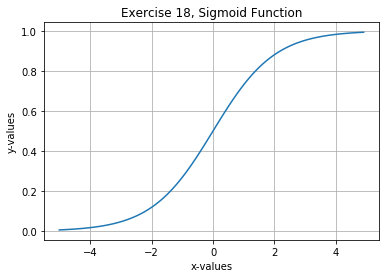

In [2]:
#Exercise 18

#Data for plotting
x = np.arange(-5.0, 5.0, 0.1)
y = 1 / (1 + np.exp(-x))

fig, ax = plt.subplots()
ax.plot(x, y)

ax.set(xlabel = 'x-values', ylabel = 'y-values', title = 'Exercise 18, Sigmoid Function')
ax.grid()

plt.show()



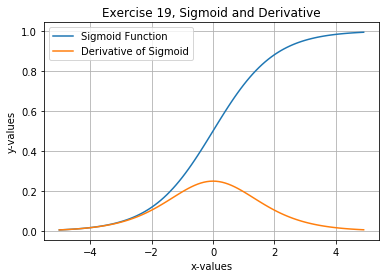

In [3]:
#Exercise 19
yprime = y * (1 - y)

fig, ax = plt.subplots()
sigline = ax.plot(x, y, label= 'Sigmoid Function')
derline = ax.plot(x,yprime, label= 'Derivative of Sigmoid')

ax.set(xlabel= 'x-values', ylabel= 'y-values', title= 'Exercise 19, Sigmoid and Derivative')
ax.legend()
ax.grid()
plt.show()

#The derivative in this case is also continuous, differentiable, and non-negative.

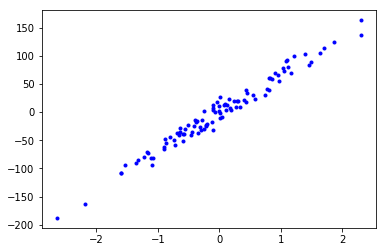

In [4]:
#Exercise 21
from sklearn.datasets import make_regression

x, y, coef = make_regression(n_samples = 100, n_features = 1, noise = 10, coef= True)
plt.plot(x, y, 'b.')
plt.show()

In [5]:
#Exercise 22

def error(w, b, x, y):
    term = np.zeros(len(x))
    for i in range(len(x)):
        term[i] = ((w*x[i,0] + b)- y[i])**2
    return np.sum(term)/(len(x))

#Paul's super neat one-liner way of doing things
def error1(w, x, y):
    return np.sum([(y[i] - w*x[i,0])**2 for i in range(len(x))]) 

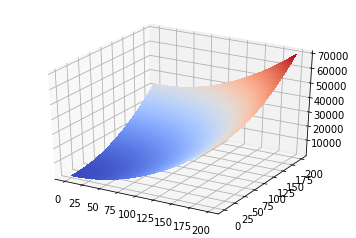

In [6]:
#Exercise 23
def make_errors(ws, bs):
    err = np.zeros((len(ws), len(bs)))
    for w in ws:
        for b in bs:
            err[w, b] = error(w, b, x, y)
    return err  

wrange = np.arange(0,200, 1)
brange = np.arange(0,200, 1)

X,Y = np.meshgrid(wrange, brange)
Z = make_errors(wrange, brange)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X,Y,Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

plt.show()

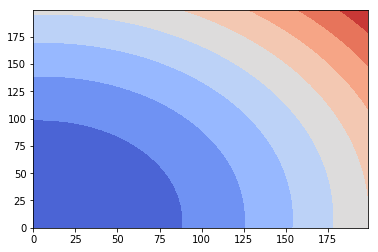

In [7]:
fig, ax = plt.subplots()
CS = ax.contourf(X, Y, Z, 10, cmap = cm.coolwarm)
plt.show()

In [8]:
#Exercise 24
def errGradient(w, b, x, y):
    #initialize the arrays
    bGrad = np.zeros(len(x))
    wGrad = np.zeros(len(x))
    
   #calculate the partials of every point in the data set for one (b,w) pair
    for i in range(len(x)):
        bGrad[i] = (2 / len(x))*-(y[i] - (w * x[i,0] + b))
        wGrad[i] = (2 / len(x))* (-x[i,0]) * (y[i] - (w * x[i,0] + b))
    
    #sum the result and multiply by the constant factor
    return np.sum(wGrad), np.sum(bGrad)
w_0 = 100
b_0 = 50
estimate = errGradient(w_0, b_0, x, y)
estimate

(163.61719884867983, 93.73284079113783)

In [9]:
def stepGradient(w, b, x, y, learningRate):
    wGrad, bGrad = errGradient(w, b, x, y) 
    new_w = w - (learningRate * wGrad)
    new_b = b - (learningRate * bGrad)
    return new_w, new_b
learningRate = 0.001
step = stepGradient(w_0, b_0, x, y, learningRate)
step

(99.83638280115132, 49.90626715920886)

In [124]:
#Exercise 27
def simpleErrGrad(w, x, y):
    errGrad = 0
    for i in range(len(x)):
        errGrad += (2/len(x)) * (x[i,0]) * (w * x[i,0] - y[i])
    return errGrad
w0 = 3
estimate = simpleErrGrad(w0, x, y)
estimate

-147.2188181514415

In [126]:
#Exercise 28
computed = (error(w0 + increment, 0, x, y) - error(w0, 0, x, y))/increment
estimate - computed

-3.501103265080019e-07

74.58158386624685


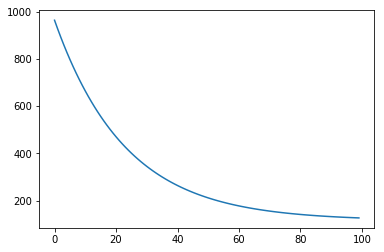

In [136]:
#Exercise 29
def calcGrad(w, x, y, learningRate, iters):
    errs = np.zeros(iters)
    for i in range(iters):
        w = w - learningRate * simpleErrGrad(w, x, y)
        errs[i] = error(w, 0, x, y)
    return w, errs
wfinal, errors = calcGrad(w_0, x, y, .01, 100)
print(wfinal)

fig, ax = plt.subplots()
plt.plot(errors)
plt.show()

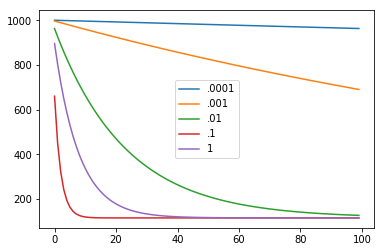

In [147]:
#Exercise 30
wfinal1, errors1 = calcGrad(w_0, x, y, .0001, 100)
wfinal2, errors2 = calcGrad(w_0, x, y, .001, 100)
wfinal3, errors3 = calcGrad(w_0, x, y, .01, 100)
wfinal4, errors4 = calcGrad(w_0, x, y, .1, 100)

fig, ax = plt.subplots()
plt.plot(errors1, label= '.0001')
plt.plot(errors2, label= '.001')
plt.plot(errors3, label= '.01')
plt.plot(errors4, label= '.1')

plt.legend()
plt.show()

#You can see that in this very simple case, a higher learning rate
#results in the gradient converging very quickly.